In [11]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [12]:
# define instruments to download
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'Navistar': 'NAV',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'Symantec': 'SYMC',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Mitsubishi': 'MSBHY',
 'Sony': 'SNE',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Ford': 'F',
 'Bank of America': 'BAC'
}
companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [13]:
# Define which online source to use
data_source = 'yahoo'

#define start and end dates
start_date = '2017-01-01'
end_date = '2019-01-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None), MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'GE', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSBHY', 'MSFT', 'NAV', 'NOC', 'PEP', 'SNE', 'SYMC', 'TM', 'TXN', 'VLO', 'WBA', 'XOM']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [14]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AAPL     116.150002
AMZN     753.669983
AXP       75.349998
BA       156.970001
BAC       22.530001
CVX      117.849998
F         12.590000
GE        30.471153
HMC       29.610001
IBM      167.190002
INTC      36.599998
JNJ      115.839996
KO        41.799999
LMT      253.309998
MA       105.389999
MCD      119.620003
MSBHY     42.669998
MSFT      62.580002
NAV       31.840000
NOC      234.889999
PEP      104.650002
SNE       28.290001
SYMC      24.010000
TM       118.550003
TXN       73.580002
VLO       70.419998
WBA       82.959999
XOM       90.889999
Name: 2017-01-03 00:00:00, dtype: float64


In [15]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape
# create movements dataset filled with 0's

movements = np.zeros([row, col])

for i in range(0, row):
    movements[i, :] = np.subtract(stock_close[i, :], stock_open[i, :])

In [16]:
for i in range(0, len(companies)):
    print('Company: {}, change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, change: 12.089981079101562
Company: Amazon, change: -616.2402954101562
Company: American Express, change: -13.059906005859375
Company: Boeing, change: 6.760162353515625
Company: Bank of America, change: -9.200019836425781
Company: Chevron, change: -32.10986328125
Company: Ford, change: -8.059996128082275
Company: General Electric, change: -21.663456916809082
Company: Honda, change: -8.289995193481445
Company: IBM, change: -60.99986267089844
Company: Intel, change: 1.0100440979003906
Company: Johnson & Johnson, change: 13.929946899414062
Company: Coca Cola, change: 5.6599884033203125
Company: Lockheed Martin, change: -103.93986511230469
Company: MasterCard, change: 9.209991455078125
Company: McDonalds, change: 9.919944763183594
Company: Mitsubishi, change: -0.05995941162109375
Company: Microsoft, change: -14.720012664794922
Company: Navistar, change: -33.259952545166016
Company: Northrop Grumman, change: -63.08050537109375
Company: Pepsi, change: 7.080047607421875
Compan

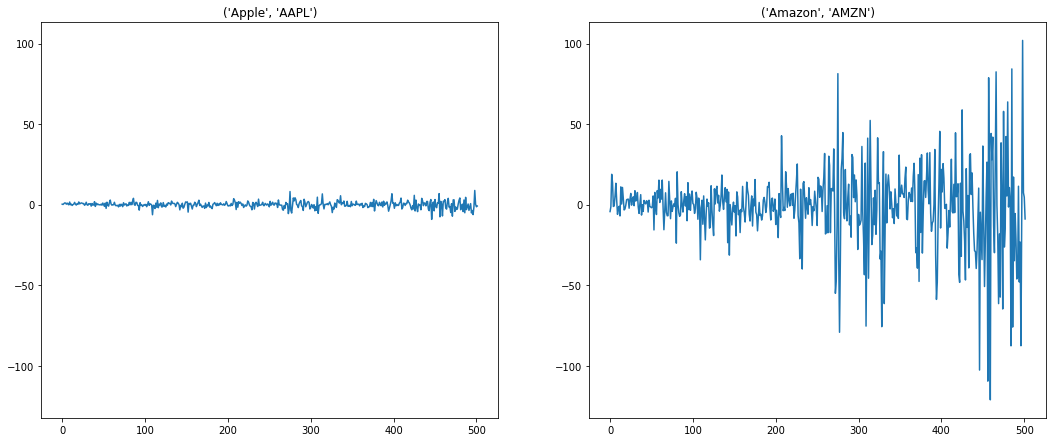

In [20]:
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [19]:
#import Normalizer
from sklearn.preprocessing import Normalizer
#create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)
print(new.max())
print(new.min())
print(new.mean())

0.30479870737531944
-0.39516464170116167
-0.0014267273885130256


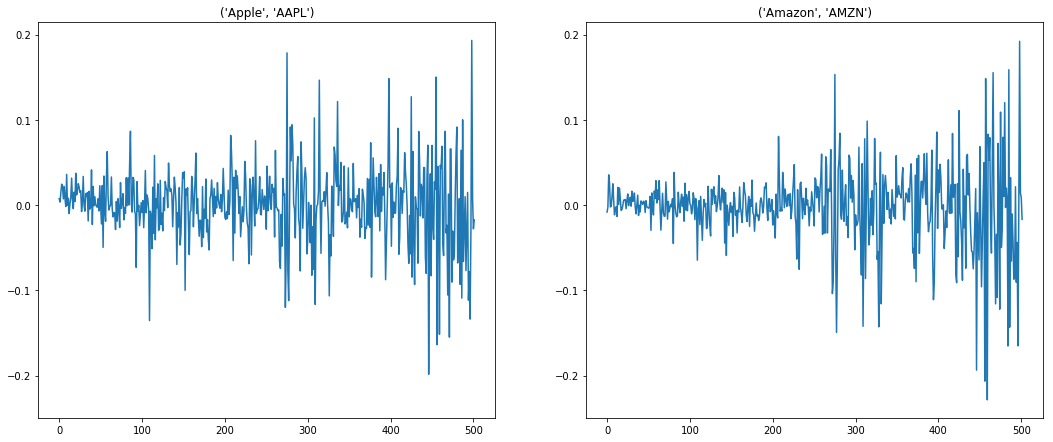

In [23]:
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [24]:
#import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

#define normalizer
normalizer = Normalizer()

#create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans 
pipeline = make_pipeline(normalizer, kmeans)

In [25]:
# fit pipeline to daily stock movements 
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [26]:
print(kmeans.inertia_)

7.497196344441301


In [27]:
#predict cluster labels
labels = pipeline.predict(movements)

#create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels' : labels, 'companies' : companies})

#display df sorted by cluster labels 
print(df.sort_values('labels'))

    labels                 companies
24       0  (Texas Instruments, TXN)
10       0             (Intel, INTC)
8        1              (Honda, HMC)
2        1   (American Express, AXP)
4        1    (Bank of America, BAC)
23       1              (Toyota, TM)
6        1                 (Ford, F)
9        1                (IBM, IBM)
16       1       (Mitsubishi, MSBHY)
13       2    (Lockheed Martin, LMT)
3        2              (Boeing, BA)
19       2   (Northrop Grumman, NOC)
11       3  (Johnson & Johnson, JNJ)
12       3           (Coca Cola, KO)
20       3              (Pepsi, PEP)
15       3          (McDonalds, MCD)
7        4    (General Electric, GE)
21       5               (Sony, SNE)
0        5             (Apple, AAPL)
17       5         (Microsoft, MSFT)
14       5          (MasterCard, MA)
1        5            (Amazon, AMZN)
26       6           (Walgreen, WBA)
5        7            (Chevron, CVX)
25       7      (Valero Energy, VLO)
27       7              (Exxon, XOM)
1

In [28]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components = 2).fit_transform(new)
kmeans = KMeans(n_clusters = 10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)
df = pd.DataFrame({'labels' : labels, 'companies' : companies})
print(df.sort_values('labels'))

    labels                 companies
10       0             (Intel, INTC)
24       0  (Texas Instruments, TXN)
3        0              (Boeing, BA)
21       0               (Sony, SNE)
15       1          (McDonalds, MCD)
11       1  (Johnson & Johnson, JNJ)
4        2    (Bank of America, BAC)
18       2           (Navistar, NAV)
25       3      (Valero Energy, VLO)
8        3              (Honda, HMC)
23       3              (Toyota, TM)
2        3   (American Express, AXP)
12       4           (Coca Cola, KO)
20       4              (Pepsi, PEP)
7        5    (General Electric, GE)
6        5                 (Ford, F)
22       6          (Symantec, SYMC)
19       6   (Northrop Grumman, NOC)
13       6    (Lockheed Martin, LMT)
26       7           (Walgreen, WBA)
9        7                (IBM, IBM)
16       7       (Mitsubishi, MSBHY)
0        8             (Apple, AAPL)
14       8          (MasterCard, MA)
1        8            (Amazon, AMZN)
17       8         (Microsoft, MSFT)
5

<Figure size 432x288 with 0 Axes>

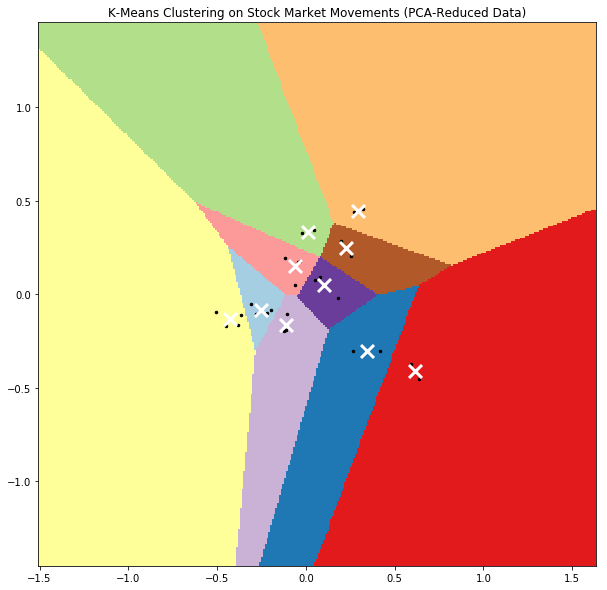

In [37]:
h = 0.01
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap = plt.cm.Paired
plt.clf()
plt.figure(figsize=(10, 10))
plt.imshow(Z, interpolation='nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = cmap, aspect = 'auto', origin = 'lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidth = 3, color = 'w', zorder = 10)
plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()